<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

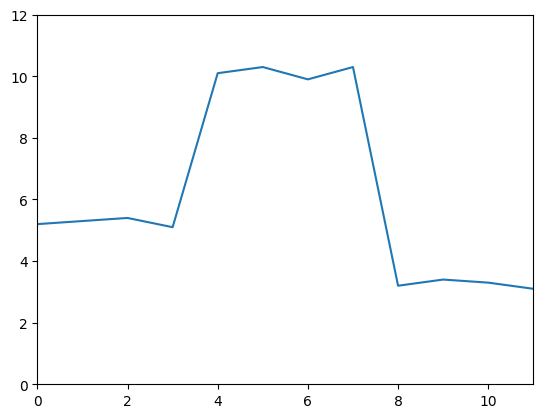

71.115


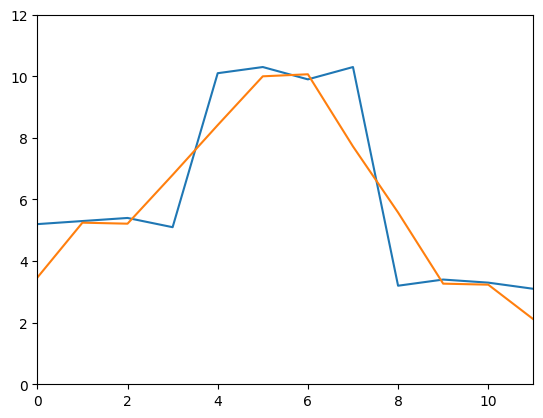

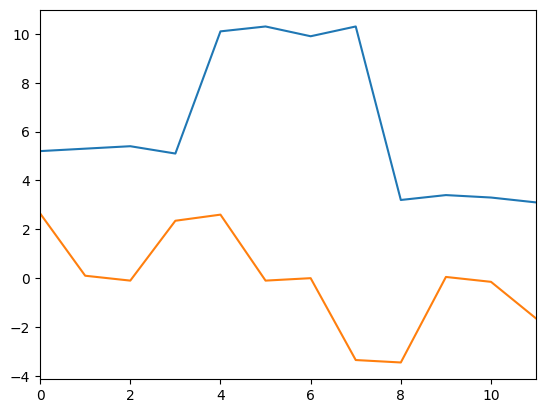

[ 3.465  5.214  8.415 10.065  5.577  3.234]
69.55999999999999


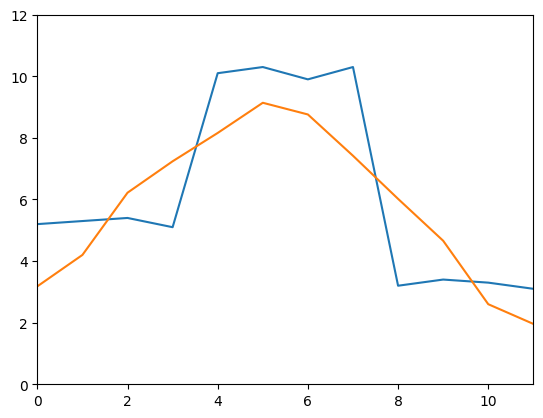

68.277


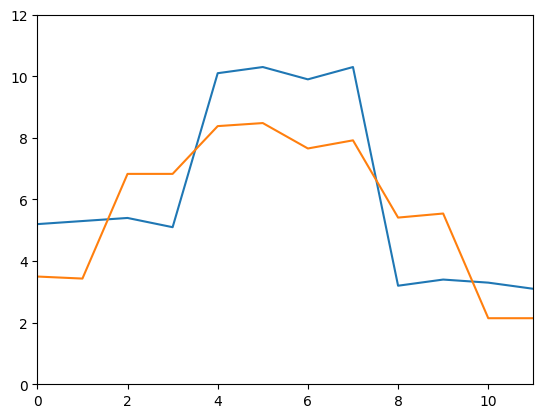

[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]
[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]
If we apply the same convolution twice, it equals one convolution with kernel ω * ω.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1], dtype=float)

fig, ax = plt.subplots()
ax.plot(x)
ax.set_xlim(0, 11)
ax.set_ylim(0, 12)
plt.show()

def conv_3_1_1_zp(x_in, omega):
    n = len(x_in)
    k = 3
    d = 1
    c = k // 2
    x_out = np.zeros(n, dtype=float)
    for i in range(n):
        s = 0.0
        for m in range(k):
            j = i + (m - c) * d
            if 0 <= j < n:
                s += omega[m] * x_in[j]
        x_out[i] = s
    return x_out

omega = np.array([0.33, 0.33, 0.33])
h = conv_3_1_1_zp(x, omega)
print(np.sum(h))

fig, ax = plt.subplots()
ax.plot(x)
ax.plot(h)
ax.set_xlim(0, 11)
ax.set_ylim(0, 12)
plt.show()

omega = np.array([-0.5, 0.0, 0.5])
h2 = conv_3_1_1_zp(x, omega)

fig, ax = plt.subplots()
ax.plot(x)
ax.plot(h2)
ax.set_xlim(0, 11)
plt.show()

def conv_3_2_1_zp(x_in, omega):
    n = len(x_in)
    k = 3
    d = 1
    c = k // 2
    stride = 2
    out_len = int(np.ceil(n / stride))
    x_out = np.zeros(out_len, dtype=float)
    for i_out in range(out_len):
        i = i_out * stride
        s = 0.0
        for m in range(k):
            j = i + (m - c) * d
            if 0 <= j < n:
                s += omega[m] * x_in[j]
        x_out[i_out] = s
    return x_out

omega = np.array([0.33, 0.33, 0.33])
h3 = conv_3_2_1_zp(x, omega)
print(h3)

def conv_5_1_1_zp(x_in, omega):
    n = len(x_in)
    k = 5
    d = 1
    c = k // 2
    x_out = np.zeros(n, dtype=float)
    for i in range(n):
        s = 0.0
        for m in range(k):
            j = i + (m - c) * d
            if 0 <= j < n:
                s += omega[m] * x_in[j]
        x_out[i] = s
    return x_out

omega2 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
h4 = conv_5_1_1_zp(x, omega2)
print(np.sum(h4))

fig, ax = plt.subplots()
ax.plot(x)
ax.plot(h4)
ax.set_xlim(0, 11)
ax.set_ylim(0, 12)
plt.show()

def conv_3_1_2_zp(x_in, omega):
    n = len(x_in)
    k = 3
    d = 2
    c = k // 2
    x_out = np.zeros(n, dtype=float)
    for i in range(n):
        s = 0.0
        for m in range(k):
            j = i + (m - c) * d
            if 0 <= j < n:
                s += omega[m] * x_in[j]
        x_out[i] = s
    return x_out

omega = np.array([0.33, 0.33, 0.33])
h5 = conv_3_1_2_zp(x, omega)
print(np.sum(h5))

fig, ax = plt.subplots()
ax.plot(x)
ax.plot(h5)
ax.set_xlim(0, 11)
ax.set_ylim(0, 12)
plt.show()

def get_conv_mat_3_1_1_zp(n_out, omega):
    W = np.zeros((n_out, n_out), dtype=float)
    offsets = [-1, 0, 1]
    for i in range(n_out):
        for m, off in enumerate(offsets):
            j = i + off
            if 0 <= j < n_out:
                W[i, j] = omega[m]
    return W

omega = np.array([-1.0, 0.5, -0.2])
h6 = conv_3_1_1_zp(x, omega)
print(h6)

W = get_conv_mat_3_1_1_zp(len(x), omega)
h7 = W @ x
print(h7)

print("If we apply the same convolution twice, it equals one convolution with kernel ω * ω.")
